In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
df_tr = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_train.csv')
df_te = pd.read_csv(r'C:\Users\נעמיה\fashion-mnist_test.csv')

In [3]:
dictionary = {
    0 :'T-shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())

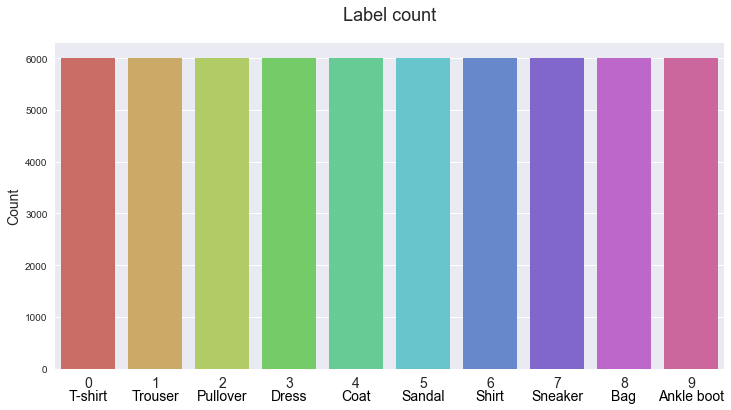

In [4]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1, figsize = (12,6))
sns.countplot(x='label', data = df_tr, ax = ax,palette="hls")

for i, counter in zip(ax.patches, range(0,10)):
        ax.text(x = i.get_x() + i.get_width()/2, y = -600,
                s = f"{class_names[counter]}",
                ha = 'center', size = 14, rotation = 0, color = 'black')

ax.set_title('Label count', fontsize = 18, y = 1.05)
ax.set_xticklabels(list(range(0,10)), fontsize = 14)
ax.set_xlabel(None)
ax.set_ylabel('Count', fontsize = 14);


Text(0.5, 1.05, 'First 30 images of Fashion MNIST')

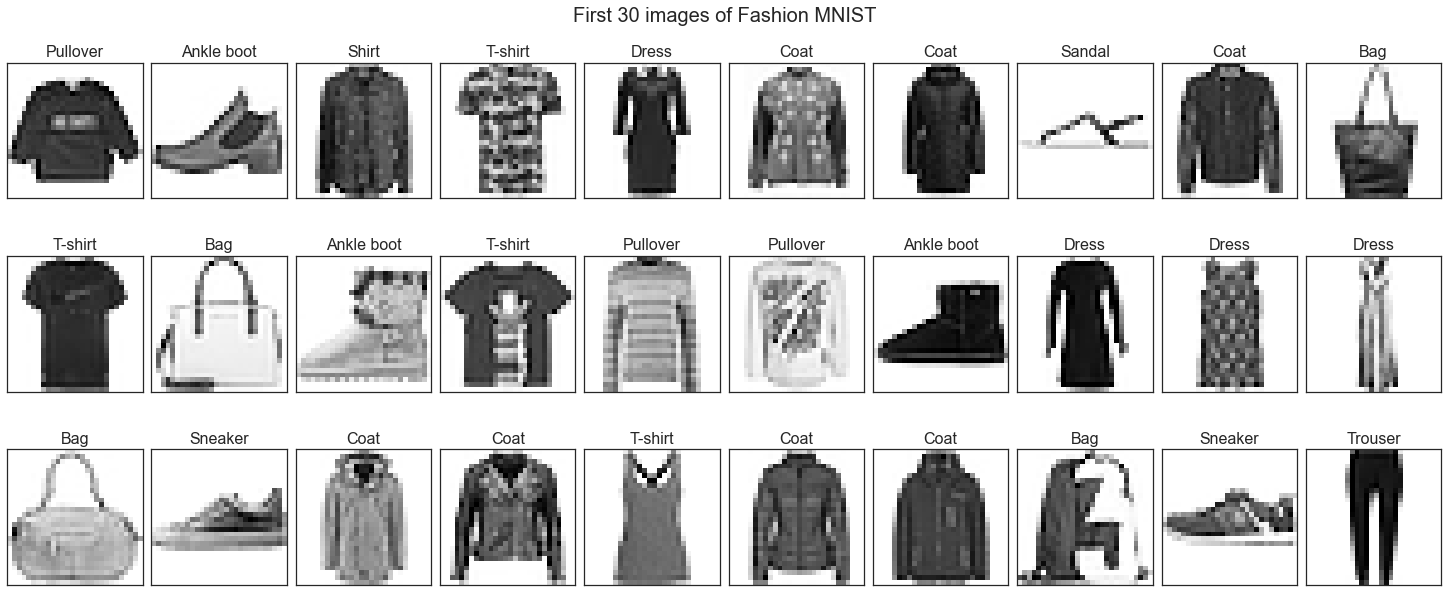

In [5]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(3,10, figsize = (20,8), constrained_layout = True)

for i, axis in zip(range(0,30), ax.ravel()):
    img = np.reshape(df_tr.iloc[i, 1:].values, (28,28))
    axis.imshow(img)
    title = dictionary[df_tr.iloc[i,0]]
    axis.set_title(title, fontsize = 16)
    axis.set_xticklabels("")
    axis.set_yticklabels("")
    
fig.suptitle('First 30 images of Fashion MNIST', size = 20, y=1.05)


In [7]:
x_train = np.array(df_tr.iloc[:,1:])
y_train = np.array(df_tr.iloc[:,0])
x_test = np.array(df_te.iloc[:,1:])
y_test = np.array(df_te.iloc[:,0])

In [11]:
print('dimensions x_train:',x_train.shape)
print('dimensions x_test:',x_test.shape)

dimensions x_train: (60000, 784)
dimensions x_test: (10000, 784)


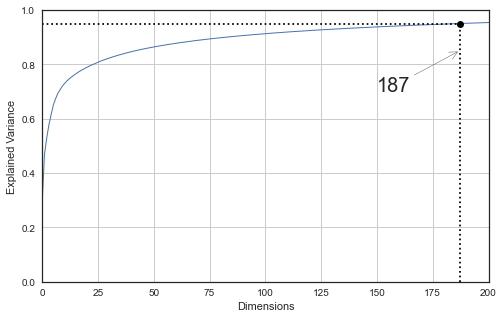

In [18]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=1)
plt.axis([0, 300, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(d, xy=(187, 0.85), xytext=(150, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=20)
plt.grid(True)

plt.show()

In [19]:
pipe_rf = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators = 25, max_depth = 12))
])
pipe_rf.fit(x_train, y_train)
rfpred = pipe_rf.predict(x_test)

In [20]:
pipe_lr = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=2000))
])
pipe_lr.fit(x_train, y_train)
lrpred = pipe_lr.predict(x_test)

In [23]:
pipe_knn = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
pipe_knn.fit(x_train, y_train)
knnpred = pipe_knn.predict(x_test)

In [24]:
pipe_et = Pipeline([
    ('pca',PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])
pipe_et.fit(x_train, y_train)
etpred = pipe_et.predict(x_test)

In [ ]:
pipe_svm = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('svm_clf', SVC())
])
pipe_svm.fit(x_train, y_train)
svmpred = pipe_svm.predict(x_test)

In [11]:
df_cm=confusion_matrix(y_test, rfpred,normalize='true')

Text(0.5, 1.05, 'Random forest - Confusion matrix')

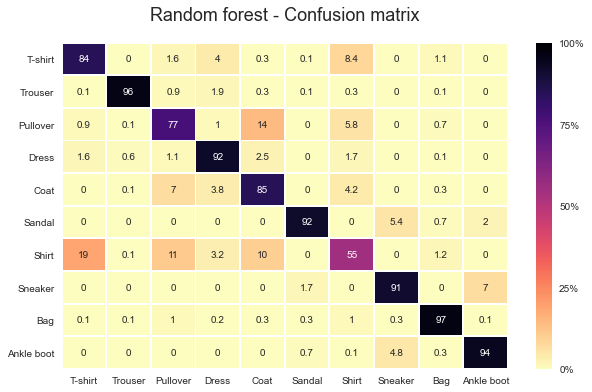

In [12]:
plt.figure(figsize = (10,6))
sns.heatmap(df_cm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="magma_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.4)
plt.title('Random forest - Confusion matrix', fontsize = 18, y = 1.05)

In [13]:
print(classification_report(y_test, rfpred))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.77      0.77      1000
           3       0.87      0.92      0.89      1000
           4       0.75      0.85      0.80      1000
           5       0.97      0.92      0.94      1000
           6       0.72      0.55      0.63      1000
           7       0.90      0.91      0.90      1000
           8       0.96      0.97      0.96      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



LogisticRegression(max_iter=2000)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
prediction_train = logReg.predict(x_train)
print(accuracy_score(y_train, prediction_train))

0.8806


In [17]:
df_cnm=confusion_matrix(y_test, prediction_test,normalize='true')

Text(0.5, 1.05, 'Logistic regression - Confusion matrix')

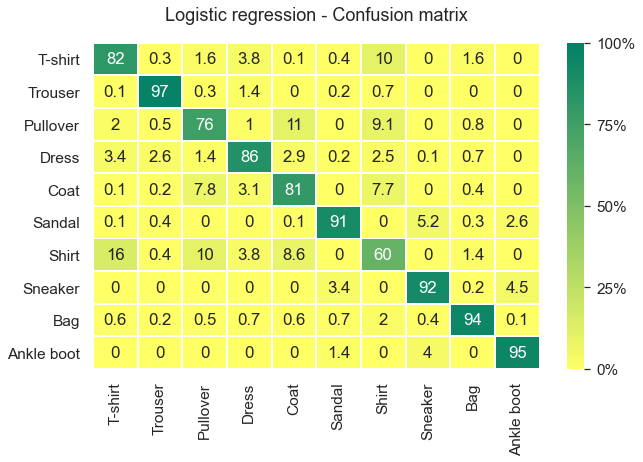

In [18]:
plt.figure(figsize = (10,6))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="summer_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.2)
plt.title('Logistic regression - Confusion matrix', fontsize = 18, y = 1.05)

In [19]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.95      0.97      0.96      1000
           2       0.77      0.76      0.77      1000
           3       0.86      0.86      0.86      1000
           4       0.78      0.81      0.79      1000
           5       0.94      0.91      0.92      1000
           6       0.65      0.60      0.62      1000
           7       0.90      0.92      0.91      1000
           8       0.95      0.94      0.94      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



KNeighborsClassifier()

In [22]:
prediction_test  = knn.predict(x_test)
df_cnm=confusion_matrix(y_test, prediction_test,normalize='true')


Text(0.5, 1.05, 'KNN - Confusion matrix')

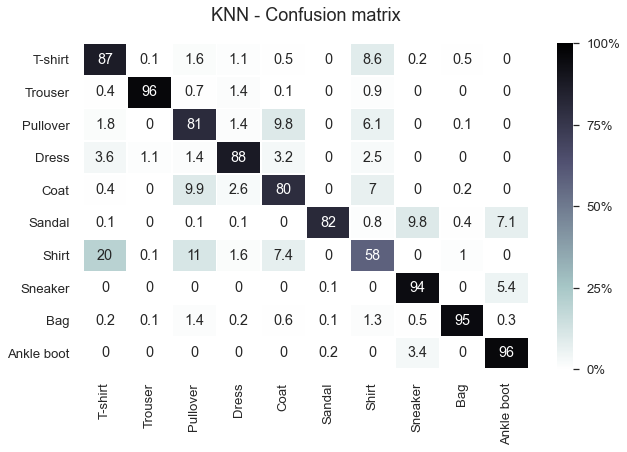

In [33]:
plt.figure(figsize = (10,6))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="bone_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.2)
plt.title('KNN - Confusion matrix', fontsize = 18, y = 1.05)

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train)

print(pca.explained_variance_ratio_)

[0.29011353 0.17727668]


In [44]:
print(x_train.shape)
print(pca_result.shape)

(60000, 784)
(60000, 2)


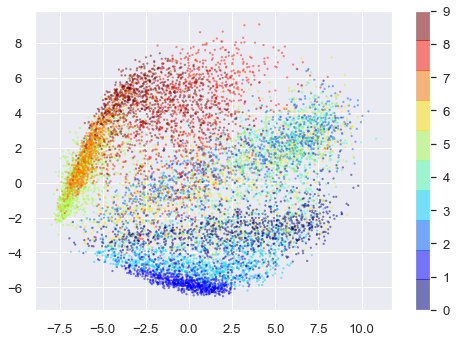

In [61]:
plt.scatter(pca_result[:10000, 0], pca_result[:10000, 1], c=y_train[:10000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

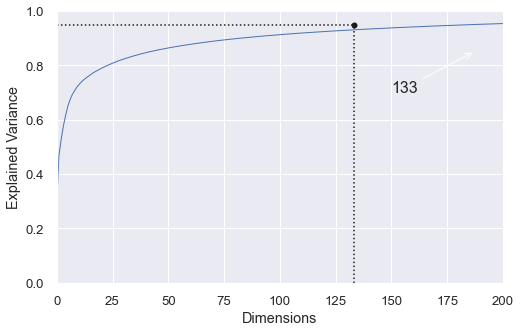

In [42]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

187

<AxesSubplot:>

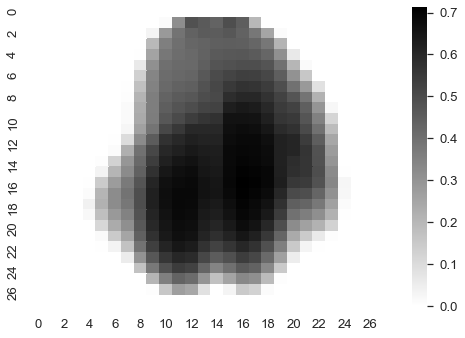

In [38]:
sns.heatmap(pd.DataFrame(x_train).median().values.reshape(28, 28), cmap='gray_r')

In [78]:
pca = PCA(n_components=187)
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)


In [81]:
x_recovered.shape

(60000, 784)

In [64]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    x_reduced, y_train, test_size=0.2, random_state=13)

In [67]:
components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
neighbors = [1, 2, 3, 4, 5, 6, 7]

scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )

In [71]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_pca, y_train_pca)
score = knn.score(X_test_pca, y_test_pca)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca, y_train_pca)
    score= knn.score(X_test_pca, y_test_pca)
    print('Components = 187', 'neighbors = ', n,', Score = ', score)   

Components = 187 neighbors =  1 , Score =  0.84875
Components = 187 neighbors =  2 , Score =  0.8465
Components = 187 neighbors =  3 , Score =  0.8568333333333333
Components = 187 neighbors =  4 , Score =  0.8613333333333333
Components = 187 neighbors =  5 , Score =  0.862
Components = 187 neighbors =  6 , Score =  0.86125
Components = 187 neighbors =  7 , Score =  0.8593333333333333
Components = 187 neighbors =  8 , Score =  0.8616666666666667
Components = 187 neighbors =  9 , Score =  0.8581666666666666
Components = 187 neighbors =  10 , Score =  0.8585833333333334
Components = 187 neighbors =  11 , Score =  0.8598333333333333
Components = 187 neighbors =  12 , Score =  0.8600833333333333
Components = 187 neighbors =  13 , Score =  0.8570833333333333
Components = 187 neighbors =  14 , Score =  0.8568333333333333
Components = 187 neighbors =  15 , Score =  0.8556666666666667
Components = 187 neighbors =  16 , Score =  0.85575
Components = 187 neighbors =  17 , Score =  0.8554166666666

In [96]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_pca)

KNeighborsClassifier()

In [97]:
prediction_test=knn.predict(X_test_pca)

print(classification_report(y_test_pca, prediction_test))


              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1171
           1       0.99      0.96      0.97      1135
           2       0.74      0.78      0.76      1179
           3       0.90      0.88      0.89      1184
           4       0.76      0.77      0.77      1222
           5       0.99      0.88      0.93      1209
           6       0.70      0.59      0.64      1226
           7       0.90      0.96      0.93      1204
           8       0.97      0.96      0.97      1248
           9       0.92      0.96      0.94      1222

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



Text(0.5, 1.05, 'KNN - Confusion matrix')

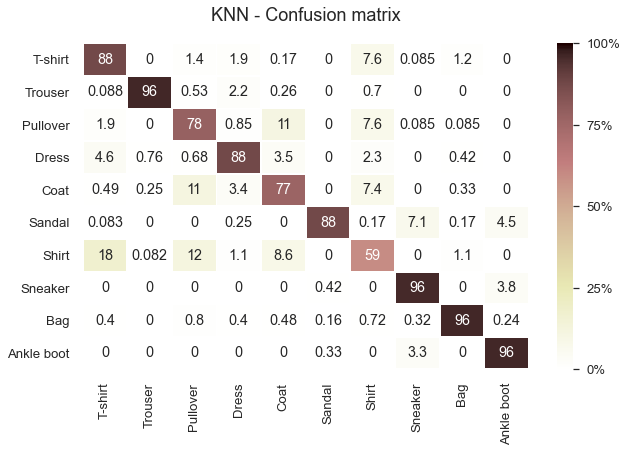

In [108]:
df_cnm=confusion_matrix(y_test_pca, prediction_test,normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="pink_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.2)
plt.title('KNN - Confusion matrix', fontsize = 18, y = 1.05)

In [11]:
pipe_svm.fit(x_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)), ('scaler', StandardScaler()),
                ('svm_clf', SVC())])

In [13]:
predict_pipe=pipe_svm.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
classes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle boot']
print(classification_report(y_test, predict_pipe,digits=4,target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top     0.8352    0.8720    0.8532      1000
     Trouser     0.9939    0.9750    0.9844      1000
    Pullover     0.8580    0.8220    0.8396      1000
       Dress     0.9123    0.9260    0.9191      1000
        Coat     0.8524    0.8720    0.8621      1000
      Sandal     0.9536    0.9650    0.9592      1000
       Shirt     0.7540    0.7110    0.7319      1000
     Sneaker     0.9419    0.9560    0.9489      1000
         Bag     0.9721    0.9770    0.9746      1000
  Ankle boot     0.9612    0.9650    0.9631      1000

    accuracy                         0.9041     10000
   macro avg     0.9035    0.9041    0.9036     10000
weighted avg     0.9035    0.9041    0.9036     10000



Text(0.5, 1.05, 'svm - Confusion matrix')

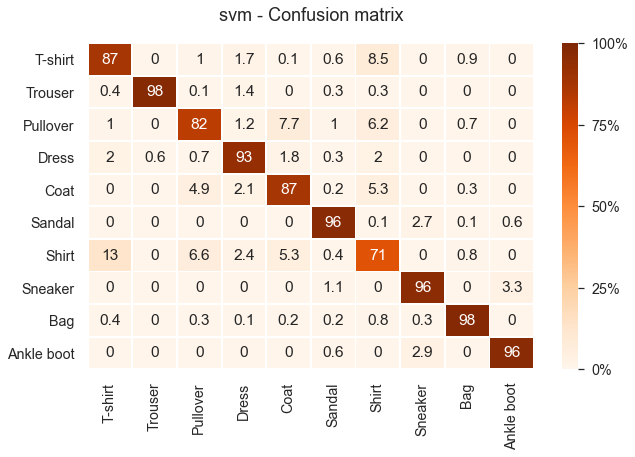

In [41]:
df_cnm=confusion_matrix(y_test, predict_pipe,normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="Oranges",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.5)
plt.title('svm - Confusion matrix', fontsize = 18, y = 1.05)

In [63]:
from sklearn.ensemble import BaggingClassifier


pipe_vote = Pipeline([
    ('scaler', StandardScaler()),('pca', PCA(n_components=0.95)),
    ('voting_clf', VotingClassifier(
        estimators=[
            ('lr', BaggingClassifier(LogisticRegression(multi_class='ovr'),
                                     n_estimators=5)),
            ('rf', RandomForestClassifier())
        ], voting='soft', n_jobs=-1))
])

In [64]:
pipe_vote.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('voting_clf',
                 VotingClassifier(estimators=[('lr',
                                               BaggingClassifier(base_estimator=LogisticRegression(multi_class='ovr'),
                                                                 n_estimators=5)),
                                              ('rf', RandomForestClassifier())],
                                  n_jobs=-1, voting='soft'))])

In [65]:
predict_vote=pipe_vote.predict(x_test)

In [66]:
print(classification_report(y_test, predict_vote,digits=4,target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top     0.7919    0.8370    0.8138      1000
     Trouser     0.9828    0.9720    0.9774      1000
    Pullover     0.7950    0.7950    0.7950      1000
       Dress     0.8656    0.9020    0.8834      1000
        Coat     0.7905    0.8490    0.8187      1000
      Sandal     0.9378    0.9190    0.9283      1000
       Shirt     0.7090    0.5750    0.6350      1000
     Sneaker     0.9118    0.9100    0.9109      1000
         Bag     0.9347    0.9590    0.9467      1000
  Ankle boot     0.9277    0.9490    0.9382      1000

    accuracy                         0.8667     10000
   macro avg     0.8647    0.8667    0.8647     10000
weighted avg     0.8647    0.8667    0.8647     10000



Text(0.5, 1.05, 'svm - Confusion matrix')

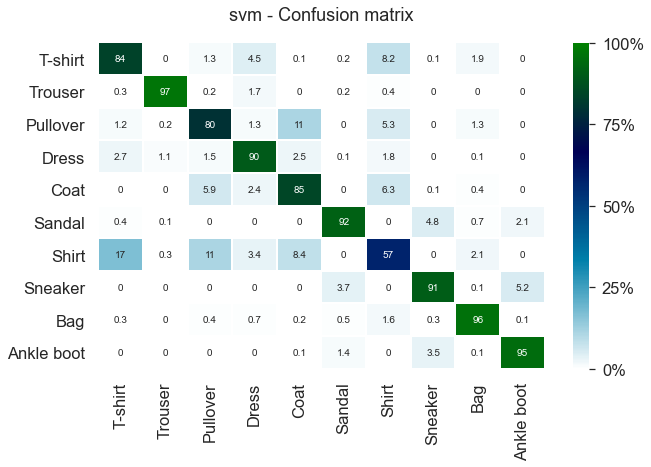

In [67]:
df_cnm=confusion_matrix(y_test, predict_vote,normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(df_cnm*100, annot=True,xticklabels=class_names,yticklabels=class_names ,linewidths=.9,cmap="ocean_r",
           cbar_kws={'format': '%.0f%%', 'ticks': [0, 25,50,75,100]},
            vmax=100,vmin=0)
sns.set(font_scale=1.5)
plt.title('svm - Confusion matrix', fontsize = 18, y = 1.05)

In [70]:
pipe_et.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('et_clf', ExtraTreesClassifier())])

In [71]:
predict_et=pipe_et.predict(x_test)

In [72]:
print(classification_report(y_test, predict_et,digits=4,target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top     0.7674    0.8610    0.8115      1000
     Trouser     0.9979    0.9660    0.9817      1000
    Pullover     0.7996    0.7940    0.7968      1000
       Dress     0.8745    0.9200    0.8967      1000
        Coat     0.7846    0.8450    0.8137      1000
      Sandal     0.9339    0.9040    0.9187      1000
       Shirt     0.7564    0.5310    0.6240      1000
     Sneaker     0.9050    0.9050    0.9050      1000
         Bag     0.9106    0.9680    0.9384      1000
  Ankle boot     0.8967    0.9460    0.9207      1000

    accuracy                         0.8640     10000
   macro avg     0.8627    0.8640    0.8607     10000
weighted avg     0.8627    0.8640    0.8607     10000



In [78]:
pipe_vote2 = Pipeline([
    ('scaler', StandardScaler()),('pca', PCA(n_components=0.95)),
    ('voting_clf', VotingClassifier(
        estimators=[
            ('svm', SVC(probability=True)),('et',ExtraTreesClassifier())
        ], voting='soft', n_jobs=-1))
])

In [79]:
pipe_vote2.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('voting_clf',
                 VotingClassifier(estimators=[('svm', SVC(probability=True)),
                                              ('et', ExtraTreesClassifier())],
                                  n_jobs=-1, voting='soft'))])

In [80]:
predict_vote2=pipe_vote2.predict(x_test)

In [81]:
print(classification_report(y_test, predict_vote2,digits=4,target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top     0.8214    0.8600    0.8403      1000
     Trouser     0.9919    0.9780    0.9849      1000
    Pullover     0.8416    0.8290    0.8353      1000
       Dress     0.8982    0.9260    0.9119      1000
        Coat     0.8394    0.8780    0.8583      1000
      Sandal     0.9683    0.9470    0.9575      1000
       Shirt     0.7608    0.6680    0.7114      1000
     Sneaker     0.9308    0.9410    0.9359      1000
         Bag     0.9534    0.9820    0.9675      1000
  Ankle boot     0.9454    0.9530    0.9492      1000

    accuracy                         0.8962     10000
   macro avg     0.8951    0.8962    0.8952     10000
weighted avg     0.8951    0.8962    0.8952     10000



In [83]:
pipe_vote3 = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('voting_clf', VotingClassifier(
        estimators=[
            ('lr', BaggingClassifier(LogisticRegression(multi_class='ovr',
                                                        max_iter=1000),
                                     n_estimators=5,
                                     n_jobs=-1)),
            ('svm', BaggingClassifier(SVC(probability=True),
                                      n_estimators=5,
                                      n_jobs=-1)),
            ('rf', RandomForestClassifier()),
            ('erf', ExtraTreesClassifier())
        ], voting='soft', n_jobs=-1))
])


In [84]:
pipe_vote3.fit(x_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)), ('scaler', StandardScaler()),
                ('voting_clf',
                 VotingClassifier(estimators=[('lr',
                                               BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                                                                   multi_class='ovr'),
                                                                 n_estimators=5,
                                                                 n_jobs=-1)),
                                              ('svm',
                                               BaggingClassifier(base_estimator=SVC(probability=True),
                                                                 n_estimators=5,
                                                                 n_jobs=-1)),
                                              ('rf', RandomForestClassifier()),
                                              ('e

In [85]:
predict_vote3=pipe_vote3.predict(x_test)

In [86]:
print(classification_report(y_test, predict_vote3,digits=4,target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top     0.8115    0.8610    0.8355      1000
     Trouser     0.9879    0.9760    0.9819      1000
    Pullover     0.8330    0.8130    0.8229      1000
       Dress     0.8921    0.9180    0.9049      1000
        Coat     0.8230    0.8740    0.8477      1000
      Sandal     0.9693    0.9480    0.9585      1000
       Shirt     0.7494    0.6490    0.6956      1000
     Sneaker     0.9353    0.9390    0.9371      1000
         Bag     0.9540    0.9740    0.9639      1000
  Ankle boot     0.9498    0.9640    0.9568      1000

    accuracy                         0.8916     10000
   macro avg     0.8905    0.8916    0.8905     10000
weighted avg     0.8905    0.8916    0.8905     10000



In [88]:
from sklearn.ensemble import AdaBoostClassifier
pipe_vote4 = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('scaler', StandardScaler()),
    ('svm', AdaBoostClassifier(SVC(probability=True)))
])

In [ ]:
pipe_vote4.fit(x_train,y_train)

In [ ]:
predict_vote4=pipe_vote4.predict(x_test)

In [ ]:
print(classification_report(y_test, predict_vote4,digits=4,target_names=classes))